# Airbnb 

Compañia Digital que pone a disposición de sus clientes una plataforma digital dedicada a la oferta de alojamientos particulares y sirve como medio de contacto entre los turistas y los alojadores, esta en mas de 190 paises, este sistema permite a los turistas y usuarios de la plataforma encontrar alojamiento en una casa particular u hotel, diversidad de alojamientos. 

Esta plataforma ha publicado un gran volumen de datos que permiten realizar análisis en dos sentidos, por una parte, desde el punto de vista de Airbnb, es posible identificar las preferencias y la experiencia que han tenidos los distintos clientes en los diferentes puntos de alojamiento. Por otra parte, desde el punto de vista de los clientes, es posible identificar cuáles son los mejores puntos de alojamiento teniendo en cuenta el precio, las calificaciones que han recibido y los distintos comentarios.  

tres fuentes de informacion que airbnb pone a disposición por cada ciudad: 

* Datos List: Conjunto de datos referentes a los anuncios de los inmuebles, ubicación urbana, costo de alquiles, metricas de airbnb y comentarios de los huespedes.


* Datos calendar: Datos monetarios que podemos asocidar con los anunicos de la plataforma. 


* Datos reviews: Opiniones de distintas publicaciones del huesped o inspector del anuncio, analisis desde el punto de vista de airbnb identificar las preferencias y expriencia de los clientes en los distintos puntos de alojamiento, desde los clientes es posible identificar cuales son los mejores puntos de alojamiento teniendo en cuenta el precio, calificaciones y distintos comentarios. 

¿Cual es el objetivo?

caracterizar las distintas opciones de alojamiento que pone a disposición Airbnb para la ciudad de Ámsterdam en función de los precios, disponibilidad, calificaciones, características de los alojamientos, etc.

¿Qué metodología o qué serie de pasos utilizarías para implementar un proyecto de ciencia de datos en torno al caso de uso de Airbnb?

METODO ASUM-DM

# Preparación de Datos

In [108]:
import pandas as pd 
import os
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

#libreria para el test chi cuadrado 
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Calcular el test estadístico
from statsmodels.stats import weightstats as stests

In [88]:
df =  pd.read_csv('C:/Users/XMX5634/Documents/Introduccion Ciencia de Datos Aplicada/listings.csv')

In [3]:
df.head(2)

id                         listing_url     scrape_id last_scraped  \
0   2818   https://www.airbnb.com/rooms/2818  2.021040e+13   12/04/2021   
1  20168  https://www.airbnb.com/rooms/20168  2.021040e+13   12/04/2021   

                                           name  \
0      Quiet Garden View Room & Super Fast WiFi   
1  Studio with private bathroom in the centre 1   

                                         description  \
0  Quiet Garden View Room & Super Fast WiFi<br />...   
1  17th century Dutch townhouse in the heart of t...   

                               neighborhood_overview  \
0  Indische Buurt ("Indies Neighborhood") is a ne...   
1  Located just in between famous central canals....   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/10272854/8dcc...     3159   
1  https://a0.muscache.com/pictures/69979628/fd6a...    59484   

                                  host_url  ... review_scores_communication  \
0   https://www.airbnb.com/users/show/3159  ...                        10.0   
1  https://www.airbnb.com/users/show/59484  ...                        10.0   

  review_scores_location review_scores_value                   license  \
0                    9.0                10.0                       NaN   
1                   10.0                 9.0  0363 CBB3 2C10 0C2A 1E29   

  instant_bookable calculated_host_listings_count  \
0                t                              1   
1                t                              2   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0               1.9  
1                                           0               2.5  

[2 rows x 74 columns]

In [4]:
df.shape

(17825, 74)

Tenemos un total de 17825 de datos de 74 variables.

# Tipos de datos

Nos dan el lineamiento de que tipo de analisis podemos hacer, se pueden dividir en dos categorias, Categóricos  y Numéricos.

In [5]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [6]:
def variables(df,tipo):
    numerica = 0
    categorica = 0
    categoricas = []
    numericas = []
    for col in df.columns:
        variable = df[[col]].dtypes[0]
        if str(variable) == 'object':
            categoricas.append(col)
            categorica += 1
        else:
            numericas.append(col)
            numerica += 1
                
    if tipo.lower() == 'categorica':
        return categoricas,categorica
    
    return numericas,numerica                     

In [7]:
categoricas, n = variables(df, 'categorica')

In [8]:
numericas, m = variables(df, 'numerica')

# Datos Nulos

<AxesSubplot:>

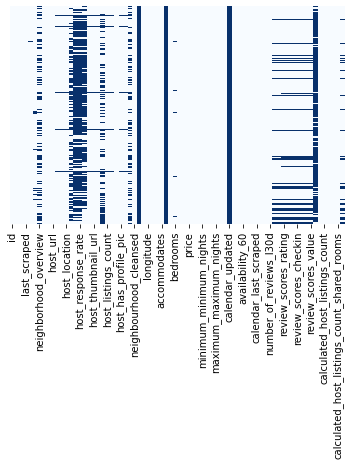

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="Blues") 

Se debe de saber que analisis/ tratamiento darle a los datos faltantes, existen varios criterios:
1. Metodos de eliminación
2. Analisis de Regresión 
3. Tecnicas de imputación de datos 
4. Mantener los vaciós

para fines de la actividad,eliminaremos conforme el analisis lo requiera. 

# Analisis exploratorio de datos
## Estadistica Univariada

 1. ¿Entre que puntajes está a lo mas el 53% de las calificaciones de revisión más bajas de la plataforma?

In [10]:
aux = df[~df['review_scores_rating'].isnull()]
aux = aux[['review_scores_rating']]

In [11]:
def tabla_intervalo_frecuencias(df,col,long_intervalos):
    #construir una tabla de frecuencias. 
    
    bins = list(range(int(min(df[col])),int(max(df[col]))+1,long_intervalos))

    aux["intervalos"] = pd.cut(df[col], bins=bins)


    rating_counts = (df.groupby("intervalos").agg(frec_absoluta=(col, "count")))
    
    rating_counts["frec_absoluta_acumulada"] = rating_counts["frec_absoluta"].cumsum()

    
    rating_counts['frec_relativa'] = rating_counts['frec_absoluta'].apply(lambda x: x/rating_counts['frec_absoluta'].sum())
    rating_counts['frec_relativa(%)'] = rating_counts['frec_relativa'].apply(lambda x: x*100 )

    
    
    rating_counts['frec_relativa_acumulada'] = rating_counts['frec_absoluta_acumulada'].apply(lambda x: x/rating_counts['frec_absoluta'].sum())  
    rating_counts['frec_relativa_acumulada(%)'] = rating_counts['frec_relativa_acumulada'].apply(lambda x: x*100)

    
    return rating_counts
    

In [12]:
tabla_intervalo_frecuencias(aux,'review_scores_rating',6)

frec_absoluta  frec_absoluta_acumulada  frec_relativa  \
intervalos                                                          
(20, 26]                0                        0       0.000000   
(26, 32]                1                        1       0.000104   
(32, 38]                0                        1       0.000000   
(38, 44]               22                       23       0.002280   
(44, 50]                9                       32       0.000933   
(50, 56]                3                       35       0.000311   
(56, 62]               94                      129       0.009741   
(62, 68]               31                      160       0.003212   
(68, 74]               80                      240       0.008290   
(74, 80]              449                      689       0.046528   
(80, 86]              443                     1132       0.045907   
(86, 92]             2037                     3169       0.211088   
(92, 98]             6481                     9650       0.671606   

            frec_relativa(%)  frec_relativa_acumulada  \
intervalos                                              
(20, 26]            0.000000                 0.000000   
(26, 32]            0.010363                 0.000104   
(32, 38]            0.000000                 0.000104   
(38, 44]            0.227979                 0.002383   
(44, 50]            0.093264                 0.003316   
(50, 56]            0.031088                 0.003627   
(56, 62]            0.974093                 0.013368   
(62, 68]            0.321244                 0.016580   
(68, 74]            0.829016                 0.024870   
(74, 80]            4.652850                 0.071399   
(80, 86]            4.590674                 0.117306   
(86, 92]           21.108808                 0.328394   
(92, 98]           67.160622                 1.000000   

            frec_relativa_acumulada(%)  
intervalos                              
(20, 26]                      0.000000  
(26, 32]                      0.010363  
(32, 38]                      0.010363  
(38, 44]                      0.238342  
(44, 50]                      0.331606  
(50, 56]                      0.362694  
(56, 62]                      1.336788  
(62, 68]                      1.658031  
(68, 74]                      2.487047  
(74, 80]                      7.139896  
(80, 86]                     11.730570  
(86, 92]                     32.839378  
(92, 98]                    100.000000

De acuerdo a la distribución acumulada el 32.83% de los datos de puntuación se encuentran entre el rango de 20 a 92 puntos. 

2. ¿Cuál es el precio promedio de alquiler de un inmueble qué se situé por encima del 78%? 

In [13]:
p = df[ ~(df['price'].isnull()) & (df['price'] != 0) ]

In [14]:
# Tabla de Percentiles 
# Rango Intercuartilico 

def tabla_percentiles(df,col):
    percentiles = list(map(lambda x: df[col].quantile(x/100), list(range(1,101,1))))
    percentiles = pd.DataFrame({'percentil' : list(range(1,101,1)),
                                'price' : percentiles})
                                
    return percentiles

In [15]:
tabla_percentiles(p,'price')

percentil    price
0           1    33.00
1           2    40.00
2           3    48.00
3           4    50.00
4           5    55.00
..        ...      ...
95         96   350.00
96         97   394.04
97         98   447.84
98         99   524.92
99        100  8000.00

[100 rows x 2 columns]

In [16]:
perc_78 = tabla_percentiles(p,'price').loc[78,['price']][0]

In [17]:
p[p['price'] >  perc_78][['price']].mean()

price    305.553209
dtype: float64

El promedio de los alquileres arriba del 78% es de 305.

3. ¿Qué porcentaje de inmuebles en la ciudad se alquilan por debajo del promedio de la ciudad? 

In [18]:
promedio = int(p[['price']].mean()[0])
down = p[p['price'] < promedio].shape[0]
up = p[p['price'] > promedio].shape[0]

print('mean down: {}, mean up: {} '.format(down/p.shape[0], up/p.shape[0]))

mean down: 0.6600033690830479, mean up: 0.33898590600258294 


4. Se desea alquilar un inmueble en la ciudad de Ámsterdam que sea 100 euros más costoso que el promedio distrital, ¿a cuantas desviaciones estaría este inmueble del promedio global?

In [19]:
promedio = p['price'].mean()
desv_estandar = p['price'].std()
promedio_plus_desv = promedio + desv_estandar
promedio_plus_100 = promedio + 100


In [20]:
print(promedio)
print(promedio_plus_desv)
print(promedio_plus_100)

154.6346790948397
308.79688269616054
254.6346790948397


Conclusiones

El 32% de las puntuaciones totales estan entre 20 a 92 puntos, el 21% de las puntuaciones estan entre 86 y 92 puntos y el 67% estan entre 92 y 98, los precios de Alquiler a nivel global estan en 154 euros y el 66% de las publicaciones se mantienen por debajo de este precio.

In [21]:
def tabla_frecuencias(df,col):
    #construir una tabla de frecuencias. 
    
    rating_counts = (df.groupby(col).agg(frec_absoluta=(col, "count")))
    
    rating_counts["frec_absoluta_acumulada"] = rating_counts["frec_absoluta"].cumsum()

    
    rating_counts['frec_relativa'] = rating_counts['frec_absoluta'].apply(lambda x: x/rating_counts['frec_absoluta'].sum())
    rating_counts['frec_relativa(%)'] = rating_counts['frec_relativa'].apply(lambda x: x*100 )

    
    
    rating_counts['frec_relativa_acumulada'] = rating_counts['frec_absoluta_acumulada'].apply(lambda x: x/rating_counts['frec_absoluta'].sum())  
    rating_counts['frec_relativa_acumulada(%)'] = rating_counts['frec_relativa_acumulada'].apply(lambda x: x*100)

    
    return rating_counts

In [22]:
tabla_frecuencias(df,'room_type')

frec_absoluta  frec_absoluta_acumulada  frec_relativa  \
room_type                                                                
Entire home/apt          13896                    13896       0.779579   
Hotel room                 124                    14020       0.006957   
Private room              3756                    17776       0.210715   
Shared room                 49                    17825       0.002749   

                 frec_relativa(%)  frec_relativa_acumulada  \
room_type                                                    
Entire home/apt         77.957924                 0.779579   
Hotel room               0.695652                 0.786536   
Private room            21.071529                 0.997251   
Shared room              0.274895                 1.000000   

                 frec_relativa_acumulada(%)  
room_type                                    
Entire home/apt                   77.957924  
Hotel room                        78.653576  
Private room                      99.725105  
Shared room                      100.000000

In [23]:
tabla_frecuencias(df, 'neighbourhood_cleansed')

frec_absoluta  \
neighbourhood_cleansed                                  
Bijlmer-Centrum                                   104   
Bijlmer-Oost                                       98   
Bos en Lommer                                    1012   
Buitenveldert - Zuidas                            230   
Centrum-Oost                                     1490   
Centrum-West                                     1982   
De Aker - Nieuw Sloten                            125   
De Baarsjes - Oud-West                           2965   
De Pijp - Rivierenbuurt                          2223   
Gaasperdam - Driemond                             117   
Geuzenveld - Slotermeer                           212   
IJburg - Zeeburgereiland                          417   
Noord-Oost                                        248   
Noord-West                                        364   
Oostelijk Havengebied - Indische Buurt            837   
Osdorp                                            116   
Oud-Noord                                         586   
Oud-Oost                                         1142   
Slotervaart                                       387   
Watergraafsmeer                                   528   
Westerpark                                       1321   
Zuid                                             1321   

                                        frec_absoluta_acumulada  \
neighbourhood_cleansed                                            
Bijlmer-Centrum                                             104   
Bijlmer-Oost                                                202   
Bos en Lommer                                              1214   
Buitenveldert - Zuidas                                     1444   
Centrum-Oost                                               2934   
Centrum-West                                               4916   
De Aker - Nieuw Sloten                                     5041   
De Baarsjes - Oud-West                                     8006   
De Pijp - Rivierenbuurt                                   10229   
Gaasperdam - Driemond                                     10346   
Geuzenveld - Slotermeer                                   10558   
IJburg - Zeeburgereiland                                  10975   
Noord-Oost                                                11223   
Noord-West                                                11587   
Oostelijk Havengebied - Indische Buurt                    12424   
Osdorp                                                    12540   
Oud-Noord                                                 13126   
Oud-Oost                                                  14268   
Slotervaart                                               14655   
Watergraafsmeer                                           15183   
Westerpark                                                16504   
Zuid                                                      17825   

                                        frec_relativa  frec_relativa(%)  \
neighbourhood_cleansed                                                    
Bijlmer-Centrum                              0.005835          0.583450   
Bijlmer-Oost                                 0.005498          0.549790   
Bos en Lommer                                0.056774          5.677419   
Buitenveldert - Zuidas                       0.012903          1.290323   
Centrum-Oost                                 0.083590          8.359046   
Centrum-West                                 0.111192         11.119215   
De Aker - Nieuw Sloten                       0.007013          0.701262   
De Baarsjes - Oud-West                       0.166339         16.633941   
De Pijp - Rivierenbuurt                      0.124712         12.471248   
Gaasperdam - Driemond                        0.006564          0.656381   
Geuzenveld - Slotermeer                      0.011893          1.189341   
IJburg - Zeeburgereiland                     0.023394          2.339411   
Noord-Oost  

# Visualización de datos

¿Cuál es el tipo de inmueble que más ha publicados Airbnb en la ciudad de Ámsterdam?



In [36]:
# Identifiquemos las variables categoricas de nuestros datos:
dicc = {}
categoricas = []
umbrales = list(range(0,50,1))

for umbral in umbrales:
    for col in df.columns:
        df_aux = df[~df[col].isnull()]
        unicos = len(df_aux[col].unique())
        if umbral == unicos:
            if str(df_aux[[col]].dtypes[0]) == 'object':
                dicc[col] = unicos
                print('{}-----------{}'.format(col,dicc[col]))
                categoricas.append(col)
        categoricas = list(set(categoricas))
            

host_is_superhost-----------2
host_has_profile_pic-----------2
host_identity_verified-----------2
has_availability-----------2
instant_bookable-----------2
host_response_time-----------4
room_type-----------4
last_scraped-----------6
calendar_last_scraped-----------6
neighbourhood_cleansed-----------22
bathrooms_text-----------27


In [37]:
for categorica in categoricas:
    data_aux2 = df[~df[categorica].isnull()][[categorica]].value_counts().reset_index()
    data_aux2.columns = [categorica, 'conteo']
    fig = px.bar(data_aux2, x = categorica , y = 'conteo', color= categorica)
    fig.show()

In [24]:
aux = df[['room_type']].value_counts().reset_index()

In [25]:
aux.columns = ['room_type', 'conteo']
fig = px.bar(aux, x = 'room_type' , y = 'conteo', color= 'room_type')
fig.show()

In [38]:
# Arreglar los datos
data = df.groupby(['neighbourhood_cleansed', 'room_type']).count().reset_index()[['id','neighbourhood_cleansed','room_type']]
# Cambiar el nombre de las columnas
data = data.rename(columns = {'id': 'conteo'})
fig = px.bar(data, x = 'room_type', y = 'conteo', color = 'neighbourhood_cleansed', barmode = 'group')
fig.show()

In [39]:
# Arreglar los datos
data = df.groupby(['neighbourhood_cleansed', 'room_type']).count().reset_index()[['id','neighbourhood_cleansed','room_type']]
# Cambiar el nombre de las columnas
data = data.rename(columns = {'id': 'conteo'})
fig = px.bar(data, x = 'room_type', y = 'conteo', color = 'neighbourhood_cleansed')
fig.show()

In [42]:
# Histograma
fig = px.histogram(df, x = 'price')
fig.show()

In [43]:
# Boxplot
fig = px.box(df, y = 'calculated_host_listings_count_entire_homes')
fig.show()

¿Qué tipo de habitaciones posee los precios más económicos de la ciudad?

In [26]:
df_aux = df[['price', 'room_type']][df['price'] != 0]

In [27]:
df_aux['Discretization'] = df['price'].apply(lambda x: 'Menor' if (x < 130) else 'Mayor')

In [28]:
df_aux

price        room_type Discretization
0         59     Private room          Menor
1        200     Private room          Mayor
2        125  Entire home/apt          Menor
3        141     Private room          Mayor
4         75     Private room          Menor
...      ...              ...            ...
17820     47     Private room          Menor
17821    200  Entire home/apt          Mayor
17822    112  Entire home/apt          Menor
17823    107  Entire home/apt          Menor
17824     94  Entire home/apt          Menor

[17809 rows x 3 columns]

In [29]:
# Arreglar los datos
data = df_aux.groupby(['room_type', 'Discretization']).count().reset_index()[['price','Discretization','room_type']]
# Cambiar el nombre de las columnas
data = data.rename(columns = {'price': 'conteo'})
fig = px.bar(data, x = 'room_type', y = 'conteo', color = 'Discretization', barmode = 'group')
fig.show()

¿Cual es el tipo de habitación que posee la mayor dispersión en sus precios de alquiler?


In [30]:
df_aux = df[df['price'] != 0][['price', 'room_type']]

In [31]:
df_aux

price        room_type
0         59     Private room
1        200     Private room
2        125  Entire home/apt
3        141     Private room
4         75     Private room
...      ...              ...
17820     47     Private room
17821    200  Entire home/apt
17822    112  Entire home/apt
17823    107  Entire home/apt
17824     94  Entire home/apt

[17809 rows x 2 columns]

In [32]:
rooms = df_aux['room_type'].value_counts()
# Tomar los nombres de las categorias
rooms = rooms.index
# Filtrar los nombres de esas categorias en la data principal
data_categoria = df_aux[df_aux['room_type'].isin(rooms)]

# Graficar con los datos filtrados. 
fig = px.box(data_categoria, x = 'price', y = 'room_type', color = 'room_type')
fig.show()

¿Las casas y apartamentos con las mejores calificaciones de revisión describen altos precios de alquiler?

In [33]:
df_aux = df[['price','review_scores_rating','room_type']][(df['price'] != 0) & ~(df['review_scores_rating'].isnull())]
df_aux['Calificaciones'] = df_aux['review_scores_rating'].apply(lambda x: 'Menor' if (x < 88) else 'Mayor')

In [34]:
rooms = df_aux['room_type'].value_counts()
# Tomar los nombres de las categorias
rooms = rooms.index
# Filtrar los nombres de esas categorias en la data principal
data_categoria = df_aux[df_aux['room_type'].isin(rooms)]

# Graficar con los datos filtrados. 
fig = px.box(data_categoria, x = 'price', y = 'room_type', color = 'Calificaciones')
fig.show()

Conclusiones

En general las casas y apartamentos, habitaciones de hotel poseen las mejores calificaciones de revisión y por ende un precio más elevado de alquiler, en los cuartos privados la tendencia tiende a ser diferente, pues los precios tienden a ser un poco más económicos. 

## Estadistica Bivariada 

### Pruebas de Correlación de Pearson y Spearman

Relación existente entre dos variables cuantitativas, ver si existe una relación entre esas doa variables, dos estadisticos que nos ayudan a medir que tanta relación hay: Pearson y Spearman. 

la correlación es relación reciproca entre dos variables, medida adimensional que mide el grado de intensidad de la linealidad entre dos variables, el resultado no tiene unidad de medida. 

Pearson:

1.  Toma valores entre -1 y 1. 
2. si el coeficiente de correlación de pearson es negativo, entonces la relación entre las dos variables cuantitativas es inversamente proporcional.
3. Positivo, la relación entre dos variables cuantitativas es directamente proporcional. 
4. Valor cercano a cero, entonces el nivel de relación lineal entre las dos variables cuantitativas es casi nula. 
5. si es cercano a 1, existe una fuerte relación lineal positiva entre las dos variables. 
6. cercano a -1, sucede lo analogo.

Spearman:

En algunos contextos, cuando el cambio entre 2 variables no es constante, se opta por estudiar su relación por Spearman. 
mide la relación monotona entre dos variables, en la relaciones monotonas, las variables tienden a cambiar al mismo tiempo, mas no necesariamente a un ritmo constante. 

1.  Se ordenan los datos de mayor a menor, teniendo en cuenta la primera variables y se construye un rango para la primera segun su posición, se construye una segunda variable de rango para la segunda variable de acuerdo a su posición. 


In [44]:
def variables(df,tipo):
    numerica = 0
    categorica = 0
    categoricas = []
    dicc = {}
    numericas = []
    for col in df.columns:
        variable = df[[col]].dtypes[0]
        if str(variable) == 'object':
            categoricas.append(col)
            categorica += 1
        else:
            numericas.append(col)
            numerica += 1
                
    if tipo.lower() == 'categorica':
        return categoricas,categorica
    
    return numericas,numerica                     

In [45]:
numericas,n = variables(df,'numerica')

In [46]:
def scatters(variables,titulo):
    n = len(variables)
    for i in range(n):
        j = i+1
        for _ in range(n - j):
            x = numericas[i]
            y = numericas[j]
            plt.scatter(df[x],df[y])
            plt.xlabel(x)
            plt.ylabel(y)
            plt.title(titulo)
            plt.show() 
            j += 1

In [50]:
# Calcular la correlacion de pearson para todos los datos numericos
def pearson_x_grupo(df,variables,grupo, method = 'pearson'):
    #matriz de correlacion
    pearson = df[variables].corr(method)
    dicc = []
    vals = []
    min_ = float(grupo.split(':')[0])
    max_ = float(grupo.split(':')[1])
    
    for index in pearson.index:
        for col in pearson.columns:
            value = pearson.loc[index,col]
            tupl = {index,col}
            if index != col:
                if tupl not in dicc:
                    dicc.append(tupl)
                    if value >= min_ and value <= max_:
                        vals.append([value,list(tupl)])
    
    for index in vals:
        x = index[1][0]
        y = index[1][1]
        print('{} vs {}             {}'.format(x,y,index[0]))
        plt.scatter(df[x],df[y])
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show() 

host_id vs id             0.5287529562370632


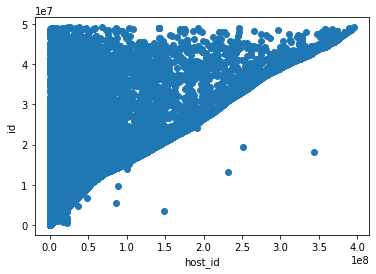

host_listings_count vs host_total_listings_count             1.0


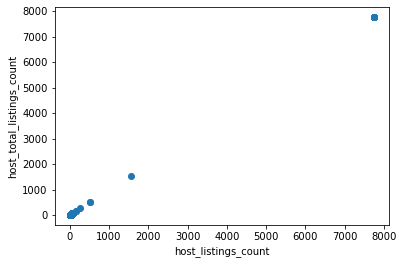

accommodates vs bedrooms             0.7038453043923599


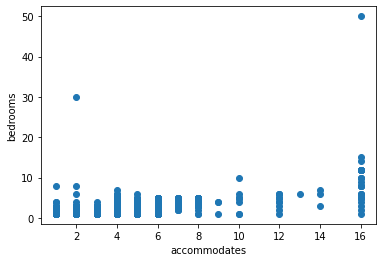

accommodates vs beds             0.7819208793314056


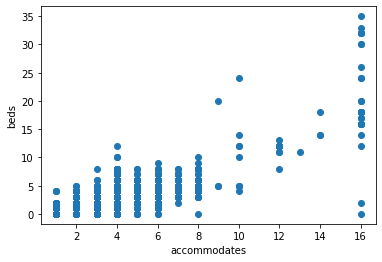

beds vs bedrooms             0.6905492341362777


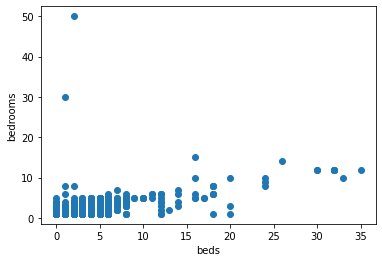

minimum_nights vs minimum_minimum_nights             0.9989216141282671


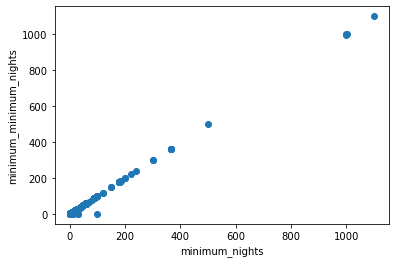

minimum_nights vs maximum_minimum_nights             0.9917229223230636


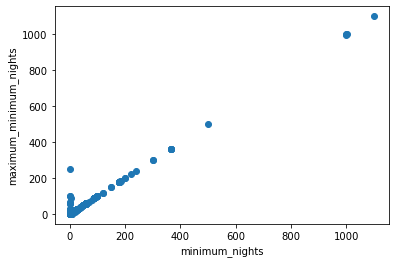

minimum_nights vs minimum_nights_avg_ntm             0.9987243513806399


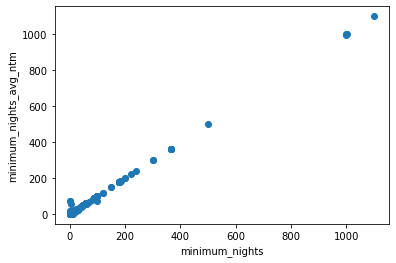

maximum_minimum_nights vs minimum_minimum_nights             0.990787666043252


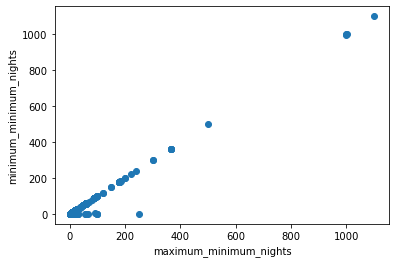

minimum_nights_avg_ntm vs minimum_minimum_nights             0.9983571083397326


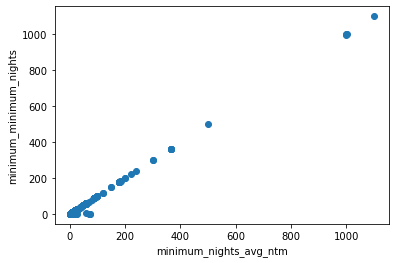

minimum_nights_avg_ntm vs maximum_minimum_nights             0.9942158997257028


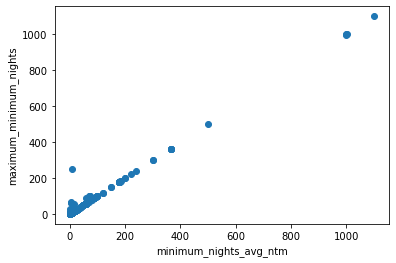

minimum_maximum_nights vs maximum_maximum_nights             0.7070870861826025


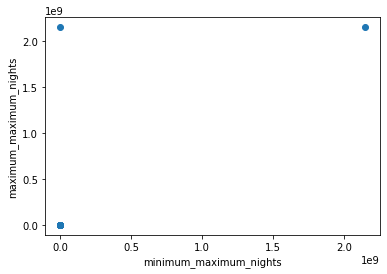

maximum_nights_avg_ntm vs minimum_maximum_nights             0.7078874996902492


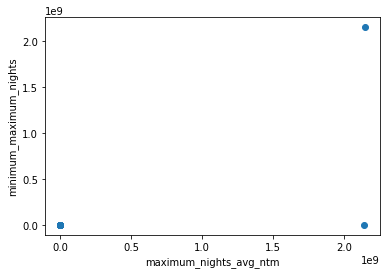

maximum_nights_avg_ntm vs maximum_maximum_nights             0.9999993586445493


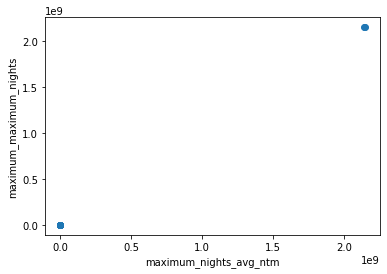

availability_60 vs availability_30             0.9838470679740401


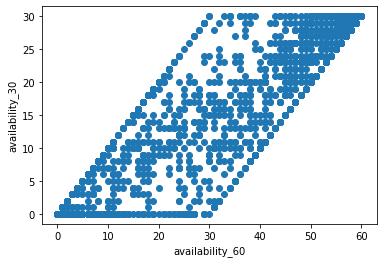

availability_30 vs availability_90             0.964420756442537


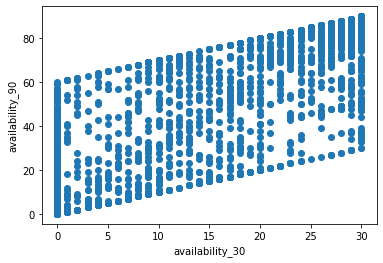

availability_365 vs availability_30             0.7828972805948593


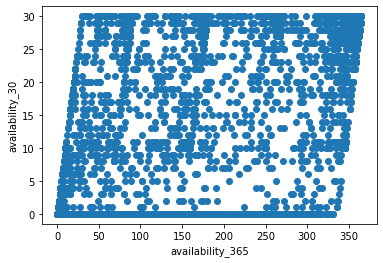

availability_60 vs availability_90             0.9922816383962931


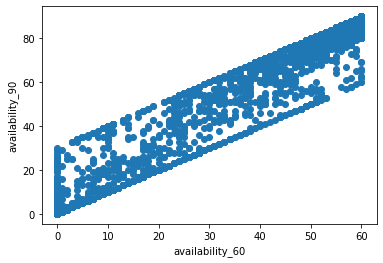

availability_365 vs availability_60             0.8090581687063201


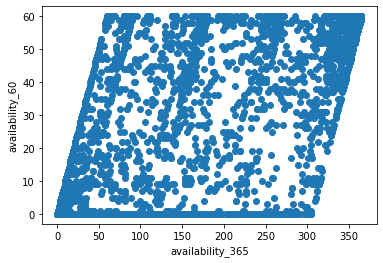

availability_365 vs availability_90             0.8255044516673116


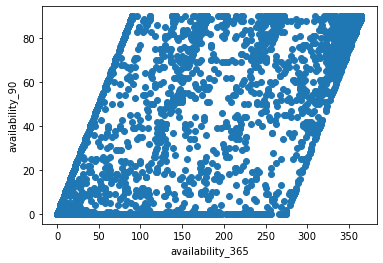

reviews_per_month vs number_of_reviews             0.8367251201786963


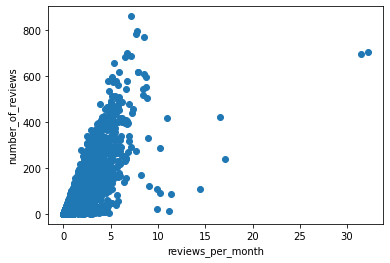

number_of_reviews_ltm vs number_of_reviews_l30d             0.5004988220248879


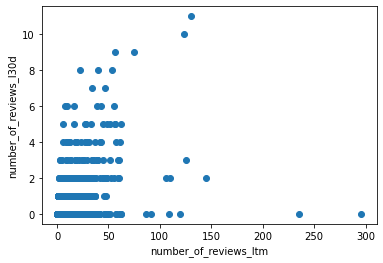

number_of_reviews_ltm vs reviews_per_month             0.6982025407556522


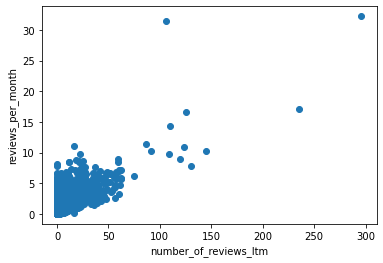

review_scores_accuracy vs review_scores_rating             0.7352566160729451


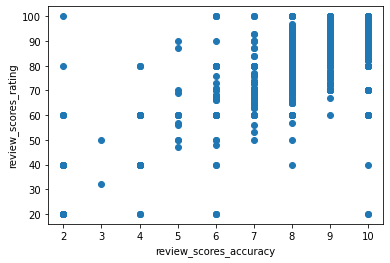

review_scores_cleanliness vs review_scores_rating             0.6968811946938148


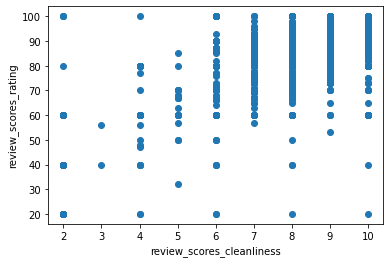

review_scores_checkin vs review_scores_rating             0.5967053723850911


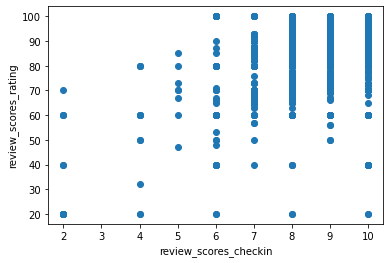

review_scores_communication vs review_scores_rating             0.6582389490883733


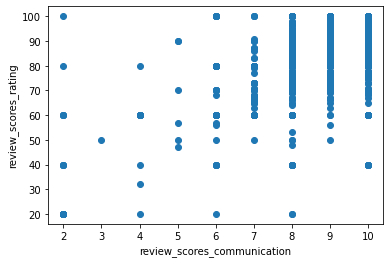

review_scores_value vs review_scores_rating             0.6963631383939406


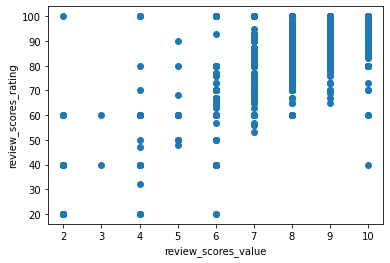

review_scores_accuracy vs review_scores_cleanliness             0.5793209498958043


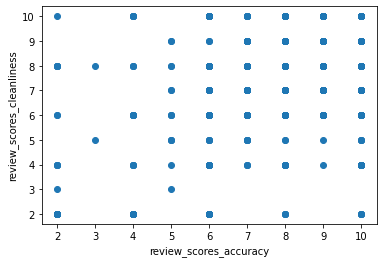

review_scores_accuracy vs review_scores_checkin             0.5397703379605882


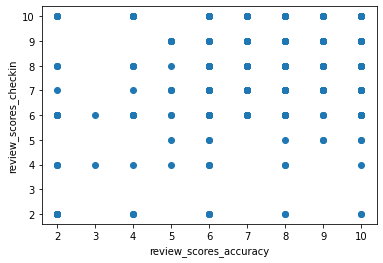

review_scores_accuracy vs review_scores_communication             0.5902779945126999


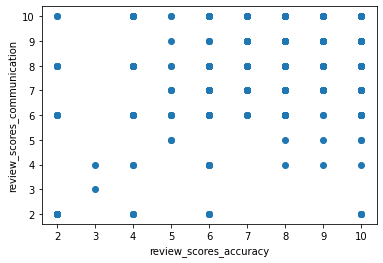

review_scores_accuracy vs review_scores_value             0.5829282828261332


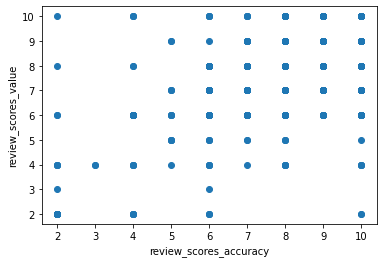

review_scores_value vs review_scores_cleanliness             0.5599944270560313


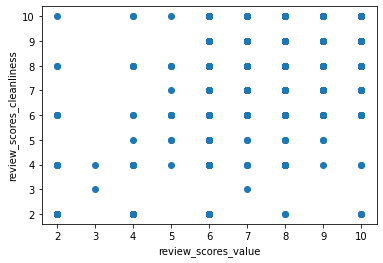

review_scores_communication vs review_scores_checkin             0.6630313305431315


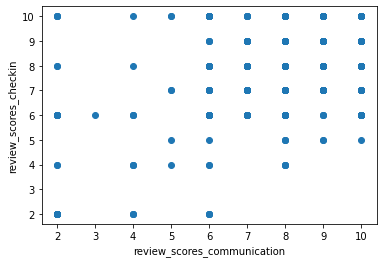

review_scores_communication vs review_scores_value             0.5225979762796966


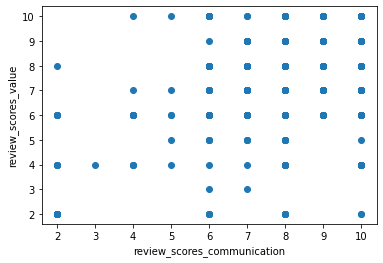

calculated_host_listings_count_entire_homes vs calculated_host_listings_count             0.9783578786581977


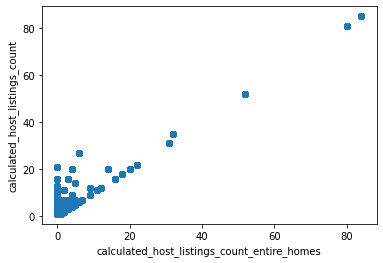

In [57]:
pearson_x_grupo(df,numericas,'0.5:1.0')

In [76]:
corr = df[numericas].corr(method = 'pearson')
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

C:\Users\XMX5634\AppData\Local\Temp/ipykernel_3068/3371815011.py:2: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`

C:\Users\XMX5634\anaconda3\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning:

All-NaN slice encountered

C:\Users\XMX5634\anaconda3\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning:

All-NaN slice encountered



In [77]:
# Pregunta1
aux = df[['review_scores_communication','review_scores_rating','room_type']].dropna()

review_scores_communication vs review_scores_rating             0.6582389490883733


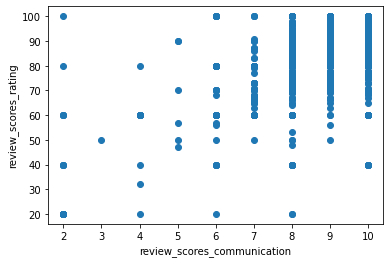

In [78]:
target = ['review_scores_communication','review_scores_rating']
pearson_x_grupo(aux,target,'-1:1')

In [79]:
# Pregunta 2 
df2 = df[['price', 'bedrooms']].dropna()
df2 = df2[df2['price'] != 0]
df2 = df2[df2['bedrooms'] != 0]
df2 = df2[df2['price'] < 400]
df2 = df2[df2['bedrooms'] <= 5]

In [80]:
df2.corr(method = 'spearman')

price  bedrooms
price     1.000000  0.470924
bedrooms  0.470924  1.000000

bedrooms vs price             0.47092372957156564


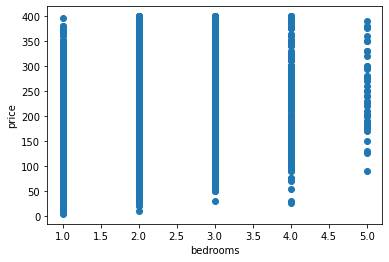

In [81]:
pearson_x_grupo(df2,['price','bedrooms'],'-1:1', 'spearman')

al observar la gráfica y calcular el coeficiente de Spearman (0.46), se observa que la existe un grado de correlación entre ambas variables (en particular entre mayor es el precio, se ofrecen más habitaciones).

Aunque el coeficiente de correlación de Pearson entre las variables sea igual a 0.65, en este caso, se sugiere calcular el coeficiente de Spearman para poder determinar si en verdad puede existir un grado de correlación monótona más fuerte entre las variables “review_scores_communication” y “review_scores_rating” que no necesariamente sea lineal.

### Tablas de Contingencia y Pruebas Chi Cuadrado

Pregunta 1. Si se alquila una habitacion con un puntuaje de revisión entre 80 y 89 puntos, ¿Que porcentajes de las publicaciones, son habitaciones pridadas o casas y apartamentos?

In [89]:
df = df[~df['review_scores_rating'].isnull()]

In [90]:
bins = list(range(int(min(aux['review_scores_rating'])),int(max(aux['review_scores_rating']))+1,10))

df["intervalos"] = pd.cut(aux["review_scores_rating"], bins=bins)


review_scores_rating_counts = df.groupby("intervalos").agg(frequency=("review_scores_rating", "count"))


In [93]:
review_scores_rating_counts.head(20)

frequency
intervalos           
(20, 30]            0
(30, 40]           23
(40, 50]            9
(50, 60]           95
(60, 70]           74
(70, 80]          482
(80, 90]         1701
(90, 100]       12768

In [107]:
df1 = pd.crosstab(df['intervalos'], df['room_type'], normalize = 'index', margins = True)
df1

room_type   Entire home/apt  Hotel room  Private room  Shared room
intervalos                                                        
(30, 40]           0.565217    0.000000      0.434783     0.000000
(40, 50]           0.666667    0.000000      0.333333     0.000000
(50, 60]           0.726316    0.000000      0.273684     0.000000
(60, 70]           0.756757    0.000000      0.243243     0.000000
(70, 80]           0.748963    0.006224      0.242739     0.002075
(80, 90]           0.713110    0.011170      0.270429     0.005291
(90, 100]          0.798011    0.005874      0.193452     0.002663
All                0.785837    0.006402      0.204857     0.002904

Respuesta el 98%

Pregunta 2. Si se alquila una casa o un apartamento ¿Que porcentaje de las publicaciones en Airbnb poseen un puntuaje entre 80 y 100 puntos de revisión

In [99]:
df2 = pd.crosstab(df['intervalos'], df['room_type'], normalize = 'columns', margins = True)
df2

room_type   Entire home/apt  Hotel room  Private room  Shared room       All
intervalos                                                                  
(30, 40]           0.001092    0.000000      0.003222     0.000000  0.001518
(40, 50]           0.000504    0.000000      0.000966     0.000000  0.000594
(50, 60]           0.005795    0.000000      0.008376     0.000000  0.006270
(60, 70]           0.004703    0.000000      0.005799     0.000000  0.004884
(70, 80]           0.030318    0.030928      0.037693     0.022727  0.031811
(80, 90]           0.101873    0.195876      0.148196     0.204545  0.112262
(90, 100]          0.855715    0.773196      0.795747     0.772727  0.842661

Respuesta el 95% aproximadamente

¿Existe independencia entre type_room y review_scores?

In [101]:
df3 = pd.crosstab(df['intervalos'], df['room_type'], margins = True)
df3

room_type   Entire home/apt  Hotel room  Private room  Shared room    All
intervalos                                                               
(30, 40]                 13           0            10            0     23
(40, 50]                  6           0             3            0      9
(50, 60]                 69           0            26            0     95
(60, 70]                 56           0            18            0     74
(70, 80]                361           3           117            1    482
(80, 90]               1213          19           460            9   1701
(90, 100]             10189          75          2470           34  12768
All                   11907          97          3104           44  15152

In [106]:
# Establecer los valores del test chi cuadrado
chi, pval, dof, exp = chi2_contingency(df3)

print('p-valor es: ', pval)

#establecer la significancia del test
significancia = 0.05
p = 1 - significancia
#establecer el valor critico 
valor_critico = chi2.ppf(p, dof)
print('chi=%.6f, valor critico=%.6f\n' % (chi, valor_critico))

# segun el valor critico se toma la desición de rechazar o no la hipotesis
if chi > valor_critico:
    print(''' A un %.2f de nivel de significancia, se rechaza la hipotesis nula y se acepta H1.
    no son independientes, por lo tanto no estan correlacionados''' %(significancia))
else:
        print(''' A un %.2f de nivel de significancia, no se rechaza la hipotesis nula y se acepta H1.
    son independientes, no tienen relación''' %(significancia))
    

p-valor es:  9.723246584737994e-08
chi=85.536742, valor critico=41.337138

 A un 0.05 de nivel de significancia, se rechaza la hipotesis nula y se acepta H1.
    no son independientes, por lo tanto no estan correlacionados


aunque se realice la prueba chi cuadrado, se puede observar que existen varias celdas con valores minimos y por lo tanto la prueba chi no es confiable, por lo tanto no es posible determinar la independencia entre las dos variables.

### Significancia Estadistica e Intervalos de Confianza

La organización Airbnb ha visto que los barrios centrales Centrum-Oost y Centrum-West, a pesar de ser centro, tienen unos cambios de precios que tienden a variar la catidad de reservas de una zona a otra. Airbnb te solicita identificar si las diferencias de precios que se ven entre la zona central-oriental (Centrum-Oost) y la zona central-occidental(Centrum-West) son significativas. Ellos tienen especial foco en comparar apartamentos de 2 alcobas.

In [109]:
for col in df.columns:
    for value in df[col].unique().tolist():
        if str(value) in ['Centrum-Oost', 'Centrum-West']:
            print(col)

neighbourhood_cleansed
neighbourhood_cleansed


In [110]:
df['neighbourhood_cleansed'].unique()

array(['Oostelijk Havengebied - Indische Buurt', 'Centrum-Oost',
       'Centrum-West', 'Zuid', 'De Pijp - Rivierenbuurt',
       'De Baarsjes - Oud-West', 'Bos en Lommer', 'Oud-Oost',
       'Noord-West', 'Westerpark', 'Slotervaart', 'Oud-Noord',
       'Watergraafsmeer', 'Geuzenveld - Slotermeer',
       'IJburg - Zeeburgereiland', 'Noord-Oost', 'Buitenveldert - Zuidas',
       'De Aker - Nieuw Sloten', 'Osdorp', 'Bijlmer-Centrum',
       'Gaasperdam - Driemond', 'Bijlmer-Oost'], dtype=object)